<a href="https://colab.research.google.com/github/gksals8378/Employee_Turnover_Prediction/blob/main/Employee_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.문제상황 및 데이터 살펴보기

## **문제상황**
---
> **시나리오** 🎫 (HRD, HRM)

```
최근 이직 시장이 활발하게 성장함에 따라 A사에 직원들도 줄줄이 퇴사 행렬을 이어가고 있다.  
핵심인재의 유출이 지속되고 있어 회사 입장에서는 큰 문제에 봉착했다. HR팀은 이를 해결하기 위해 이직 가능성이 높은 핵심인재를 대상으로  
관리 프로그램을 운영하려고 한다.
```  

## **데이터 살펴보기**

* 직원 프로필 및 업무 역할에 관한 데이터
* 데이터 명세 ⬇

|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|
|:---:|:---:|:---:|:---:|:---:|:---:|  
|나이|이직여부|출장|일당|부서|집까지의거리|
|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|
|교육수준|전공|직원수|직원번호|환경만족도|성별|
|HourlyRate|JobInvolvement|JobLevel|JobRole|JobSatisfaction|MaritalStatus|
|시급|업무 몰입도|업무레벨|업무역할|업무만족도|결혼여부|  
|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|
|월소득|월급|과거회사경험횟수|18년이상|야근여부|급여인상률|  
|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|
|고과|인간관계만족도|평균근무시간|스톡옵션레벨|총 경력|작년 훈련횟수|  
|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPromotion|YearsWithCurrManager|
|워라벨 수준|현 회사 근무년수|현재 업무 년차|마지막 승진일로부터 년차|현재 팀장함께한 년차|

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# 2.EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/팀프로젝트/이직_예측/job_transfer.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 이직여부에따른 각 feature의 histogram

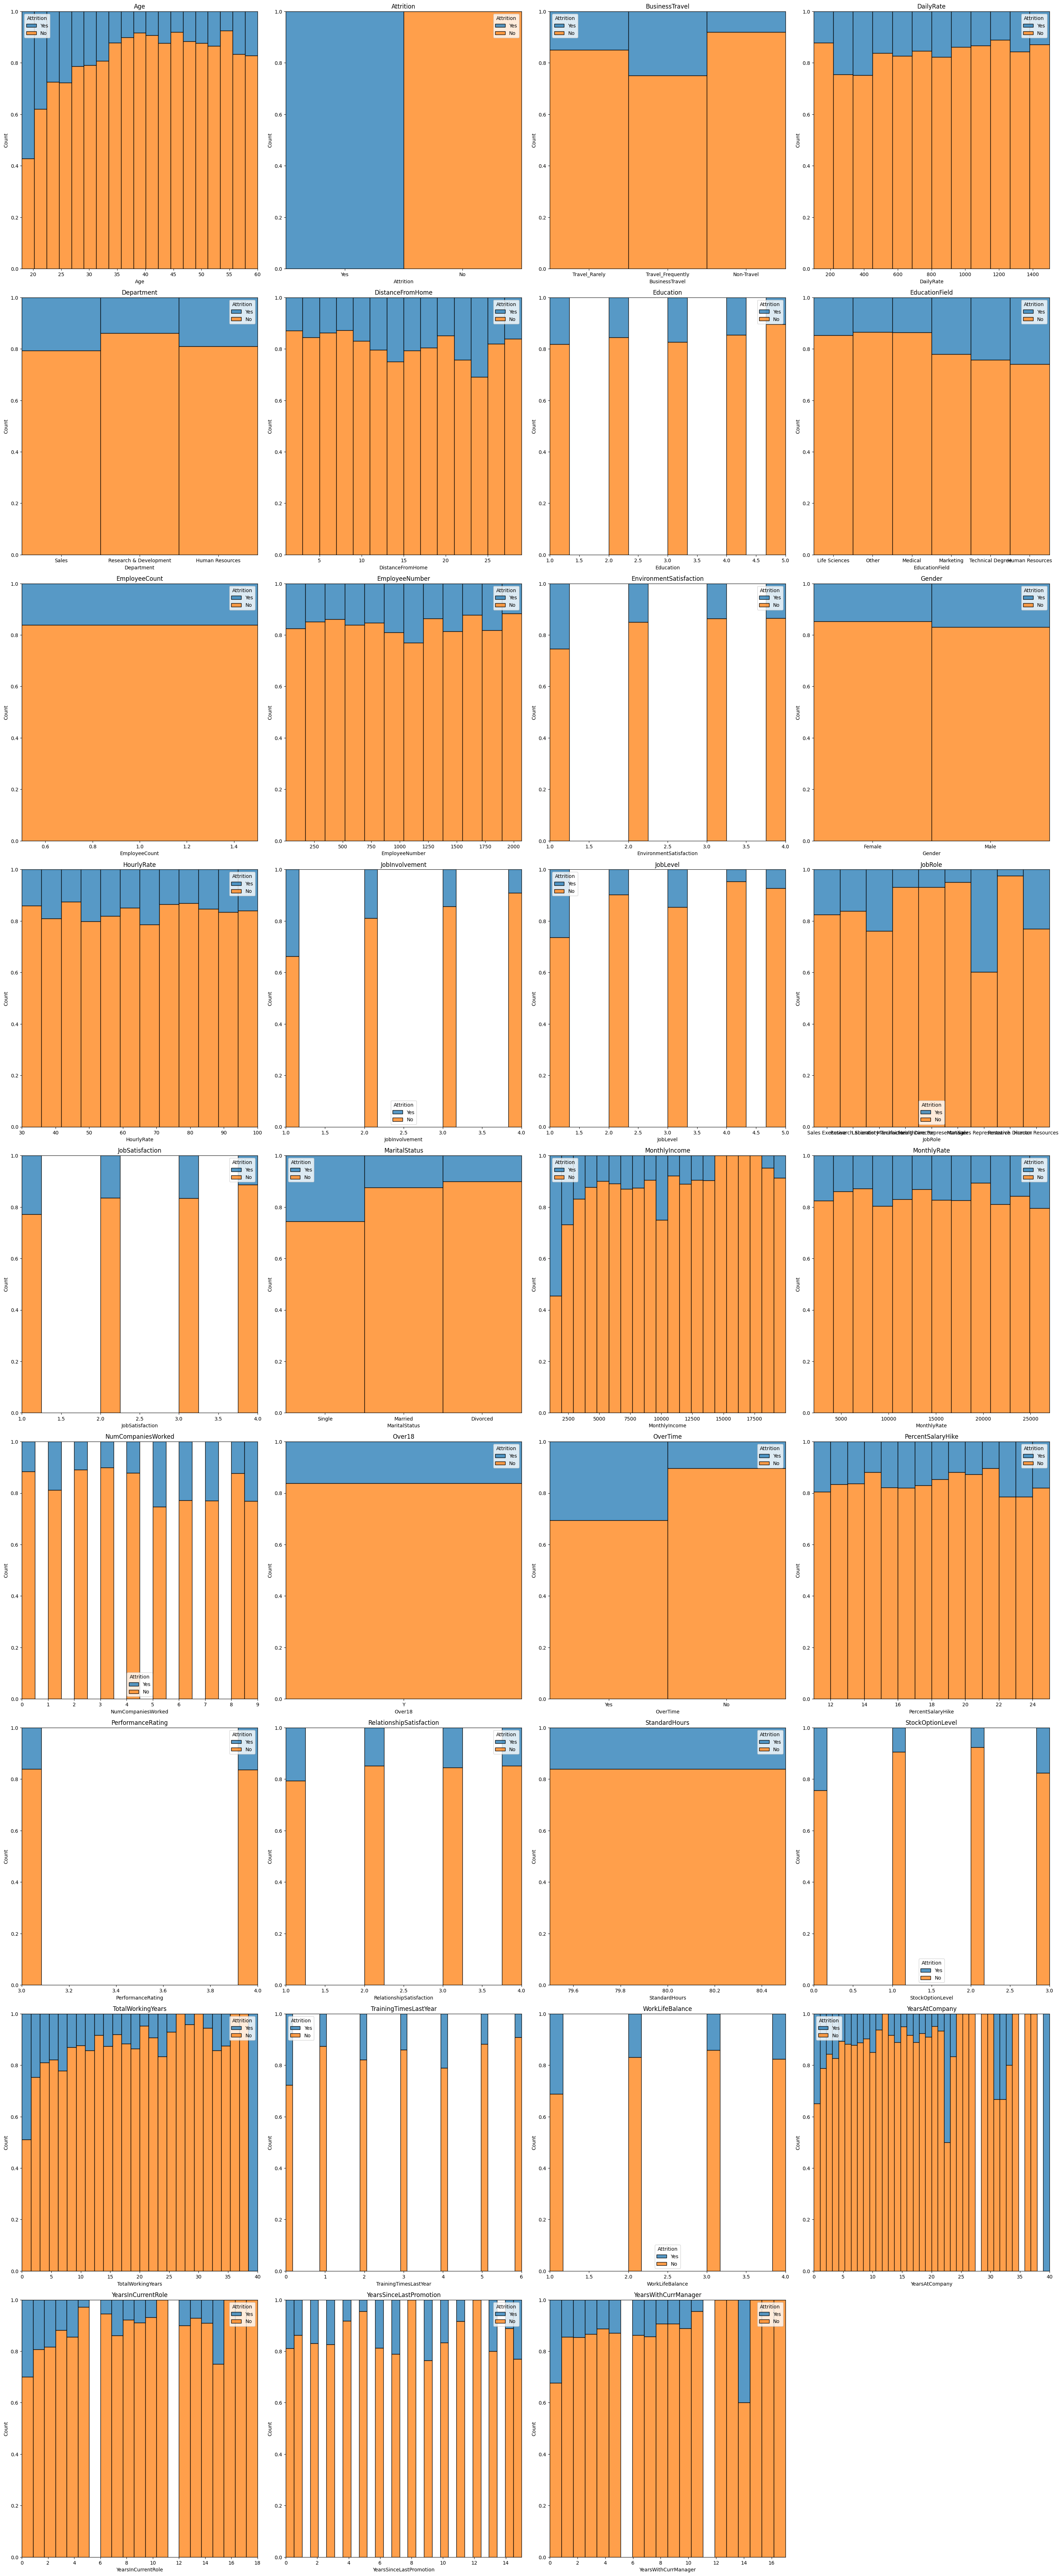

In [ ]:
fig = plt.figure(figsize=(30, 80))

for k, col in enumerate(df.columns):
      ax = fig.add_subplot(10, 4, k+1)
      sns.histplot(data=df, ax=ax, hue='Attrition', x=col, multiple="fill")
      ax.set_title(col)
plt.tight_layout()
plt.show()


## 유의미한 차이를 보여주는 feature

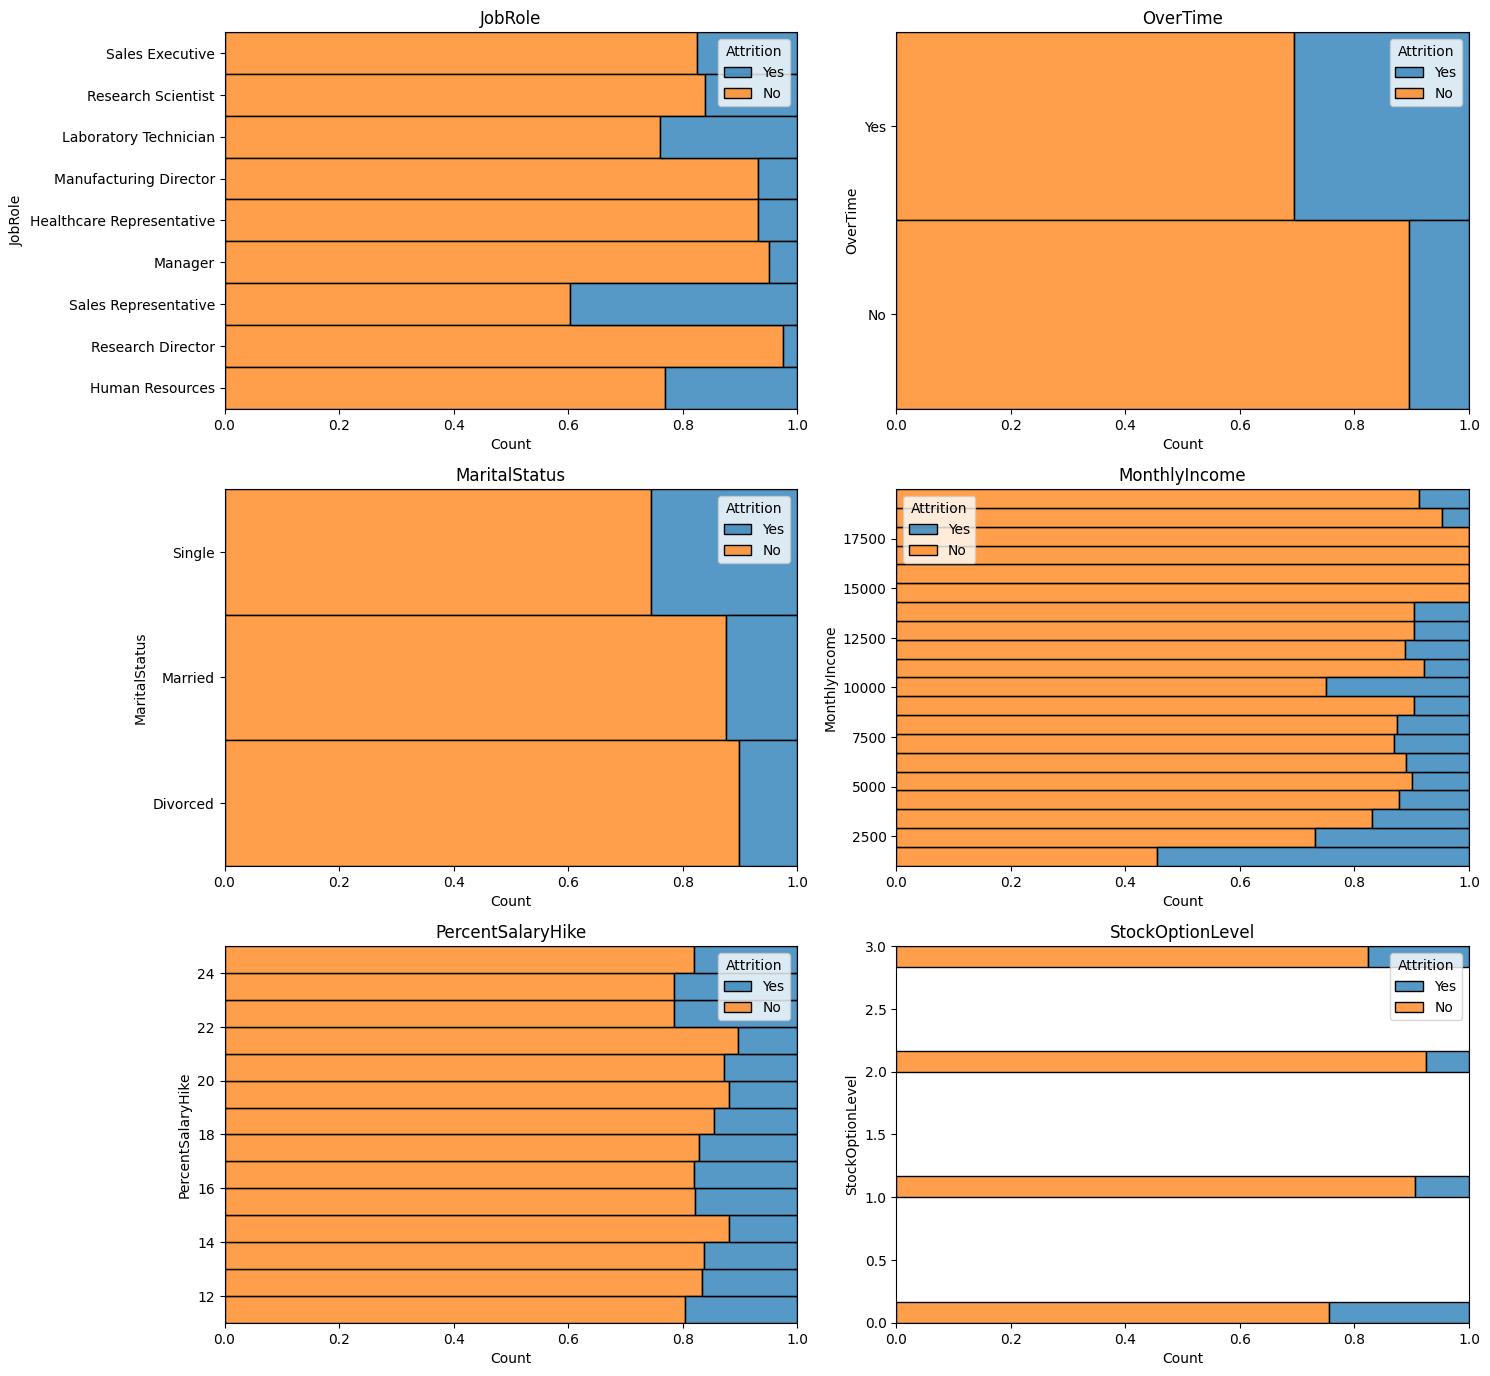

In [ ]:
fig = plt.figure(figsize=(15, 18))


for k, col in enumerate(['JobRole', 'OverTime', 'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel']):
    ax = fig.add_subplot(4, 2, k+1)
    sns.histplot(data=df, ax=ax, hue='Attrition', y=col, multiple="fill") #palette={'Yes':'orange', 'No':'lightgrey'}
    #ax.tick_params(axis='x', rotation=90)
    ax.set_title(col)

plt.tight_layout()
plt.show()

## 이직률을 줄여보자

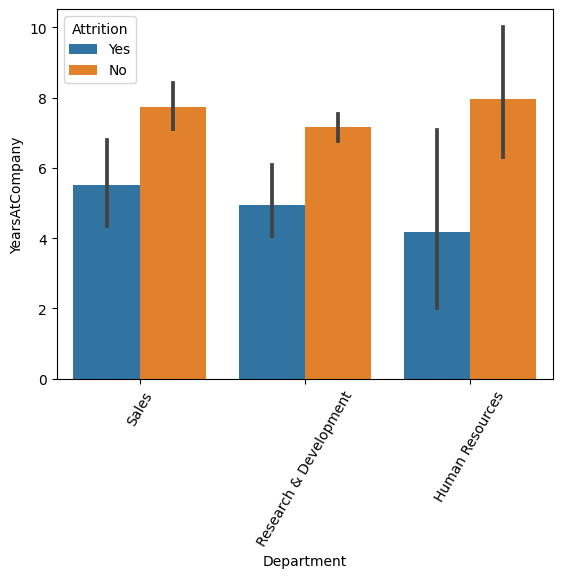

In [ ]:


sns.barplot(data=df, x="Department",y="YearsAtCompany", hue='Attrition')
plt.xticks(rotation = 60)
plt.show()

# YearsAtCompany : 현 회사 근속연수
# Sales 부서에서 근속연수가 높아도 높은 이직률을 보여주고 있다.

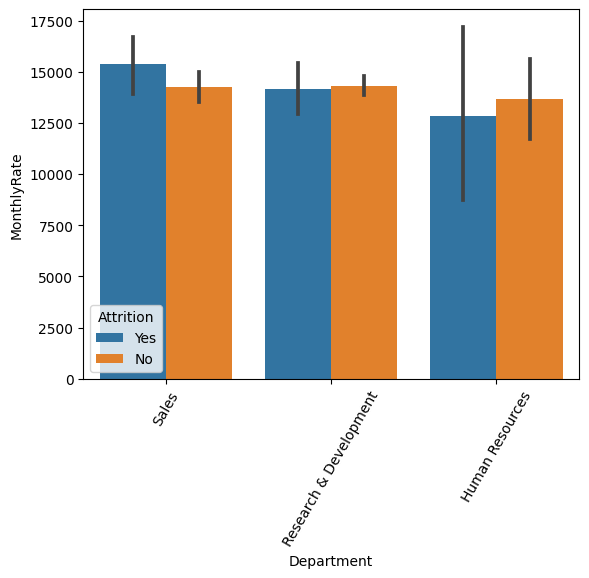

In [ ]:
sns.barplot(data=df, x="Department",y="MonthlyRate", hue='Attrition')
plt.xticks(rotation = 60)
plt.show()

# MonthlyRate : 월급
# 동일하게 Sales 부서에서 월급이 높아도 이직률이 높다.

In [ ]:
# Yes : 1
# No : 0

df['Attrition'] = np.where(df['Attrition']== 'Yes', 1, 0)
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
# Sales 부서에서 이직을 부추기는 이유는 무엇일까

a = df[df['Department'] == 'Sales'].corr().round(3)['Attrition']
a.sort_values(ascending=False)[1:6]


# DistanceFromHome            0.091 	집까지의 거리
# NumCompaniesWorked          0.081	  과거회사경험횟수
# MonthlyRate                 0.063	  월급

<ipython-input-44-b2b0d2c6b8e8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = df[df['Department'] == 'Sales'].corr().round(3)['Attrition']


DistanceFromHome            0.091
NumCompaniesWorked          0.081
MonthlyRate                 0.063
EmployeeNumber              0.020
RelationshipSatisfaction   -0.020
Name: Attrition, dtype: float64

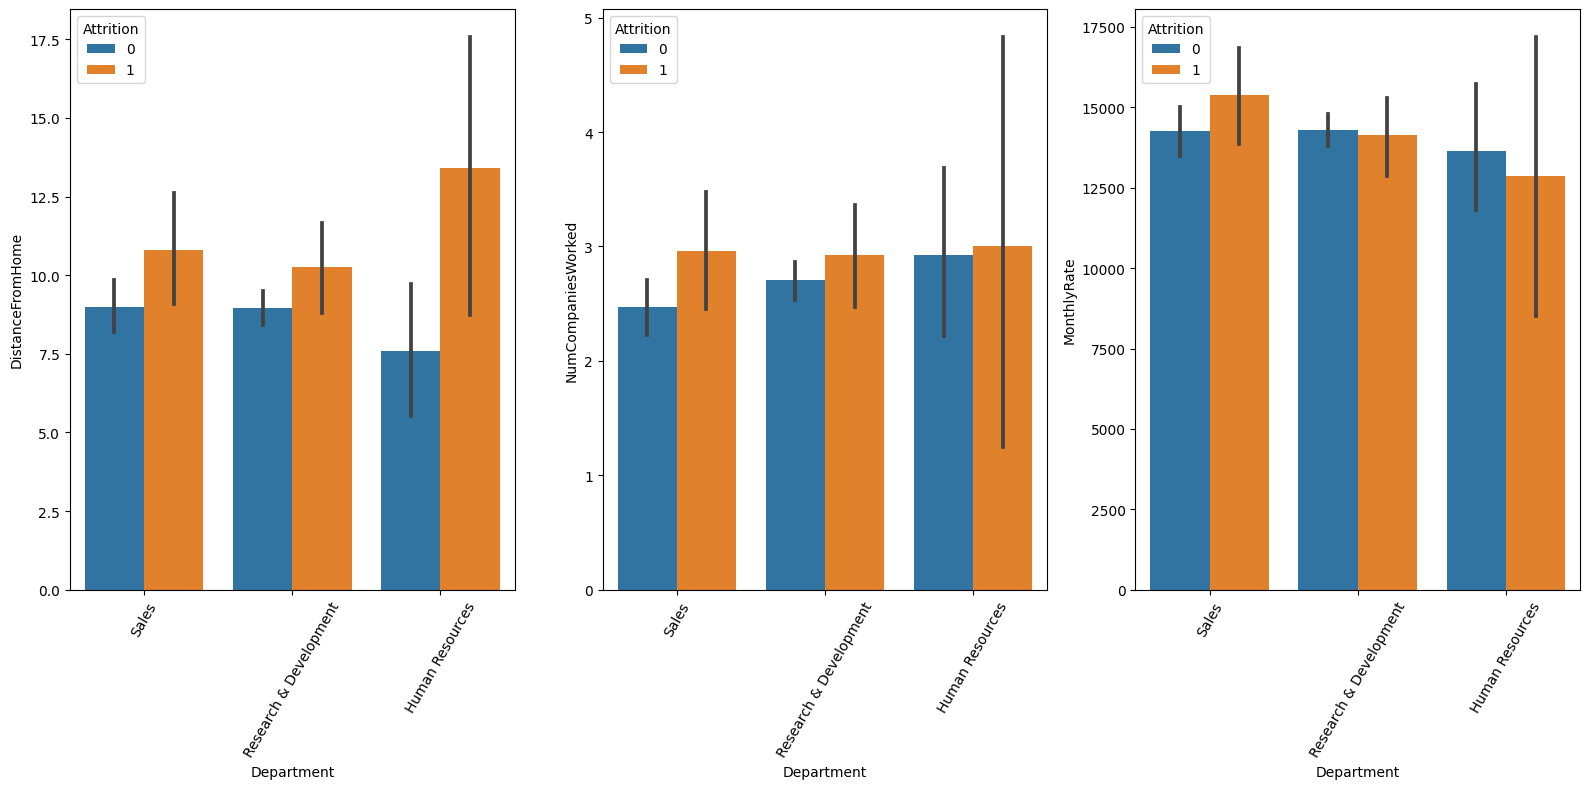

In [ ]:
# DistanceFromHome            0.091 	집까지의 거리
# NumCompaniesWorked          0.081	  과거회사경험횟수
# MonthlyRate                 0.063	  월급

col_list = ['DistanceFromHome', 'NumCompaniesWorked', 'MonthlyRate']

fig, axes = plt.subplots(1, 3, figsize=(16,8))
for idx, col in enumerate(col_list):
  ax = axes[idx]
  sns.barplot(data=df, x="Department",y=col, hue='Attrition', ax=ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.tight_layout()
plt.show()

# Attrition (Yes : 1, No : 0)
# DistanceFromHome    : Sales 부서 뿐만 아니라 다른 부서에서도 이직률이 높음
# NumCompaniesWorked  : Sales 부서 뿐만 아니라 다른 부서에서도 이직률이 높지만, 이직하지 않는 사람과의 차이가 큼
# MonthlyRate         : Sales 부서에서 가장 많은 월급을 받지만 제일 이직률이 높음

# 결론적으로 DistanceFromHome 에서의 개선이 필요할 것이라 판단

In [ ]:
# Attrition이 1에서 DistanceFromHome 평균

np.round(df[df['Attrition'] == 1]['DistanceFromHome'].mean())

11.0

In [ ]:
# DistanceFromHome가 11보다 작으면 near
# DistanceFromHome가 11보다 크면 far

df['DistanceFromHome_bi'] = np.where(df['DistanceFromHome'] <= 11, 'near', 'far')

Text(0.5, 1.0, 'Distance From Home')

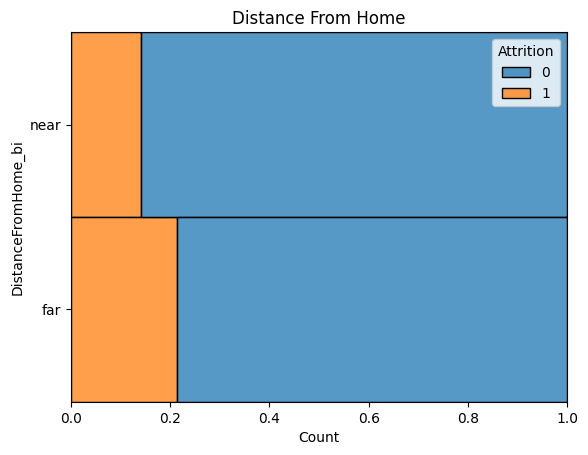

In [ ]:
sns.histplot(data=df, y='DistanceFromHome_bi', hue='Attrition', multiple='fill')
plt.title('Distance From Home')

#3.전처리

In [ ]:
df['EmployeeCount'] = df['EmployeeCount'].apply(lambda x : str(x).replace('1', '1'))
df['EmployeeCount'] = df['EmployeeCount'].astype('int')

df['StandardHours'] = df['StandardHours'].apply(lambda x : str(x).replace('80', '1'))
df['StandardHours'] = df['StandardHours'].astype('int')

df['Over18'] = df['Over18'].apply(lambda x : str(x).replace('Y', '1'))
df['Over18'] = df['Over18'].astype('int')

In [ ]:
# drop해도 될 칼럼 선정해보기
# EmployeeNumber(단순한 사번) EmployeeCount(값1개) StandardHours(값1개) Over18(값1개)
# PerformanceRating(데이터 자체가 고과가 높은 직원들만 모아놓음)

df = df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18', 'PerformanceRating'], axis=1)

In [ ]:
df['Age'] = np.where(df['Age'] <= 29, 2,
            np.where(df['Age'] <= 39, 3, 4))
df['Age'].value_counts()

3    622
4    522
2    326
Name: Age, dtype: int64

In [ ]:
df['Department'] = np.where(df['Department'] == 'Sales', 1,
                   np.where(df['Department'] == 'Research & Development', 2, 3))
df['Department'].value_counts()

2    961
1    446
3     63
Name: Department, dtype: int64

In [ ]:
df['BusinessTravel'] = np.where(df['BusinessTravel'] == 'Travel_Rarely', 1,
                       np.where(df['BusinessTravel'] == 'Travel_Frequently', 2, 3))
df['BusinessTravel'].value_counts()

1    1043
2     277
3     150
Name: BusinessTravel, dtype: int64

In [ ]:
df['EducationField'] = df['EducationField'].apply(lambda x : str(x).replace('Life Sciences', '1'))
df['EducationField'] = df['EducationField'].apply(lambda x : str(x).replace('Other', '2'))
df['EducationField'] = df['EducationField'].apply(lambda x : str(x).replace('Medical', '3'))
df['EducationField'] = df['EducationField'].apply(lambda x : str(x).replace('Marketing', '4'))
df['EducationField'] = df['EducationField'].apply(lambda x : str(x).replace('Technical Degree', '5'))
df['EducationField'] = df['EducationField'].apply(lambda x : str(x).replace('Human Resources', '6'))
df['EducationField'] = df['EducationField'].astype('int')

df['EducationField'].value_counts()

1    606
3    464
4    159
5    132
2     82
6     27
Name: EducationField, dtype: int64

In [ ]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 2)
df['Gender'].value_counts()

1    882
2    588
Name: Gender, dtype: int64

In [ ]:
df['JobRole'] = df['JobRole'].apply(lambda x : str(x).replace('Sales Executive', '1'))
df['JobRole'] = df['JobRole'].apply(lambda x : str(x).replace('Research Scientist', '2'))
df['JobRole'] = df['JobRole'].apply(lambda x : str(x).replace('Laboratory Technician', '3'))
df['JobRole'] = df['JobRole'].apply(lambda x : str(x).replace('Manufacturing Director', '4'))
df['JobRole'] = df['JobRole'].apply(lambda x : str(x).replace('Healthcare Representative', '5'))
df['JobRole'] = df['JobRole'].apply(lambda x : str(x).replace('Manager', '6'))
df['JobRole'] = df['JobRole'].apply(lambda x : str(x).replace('Sales Representative', '7'))
df['JobRole'] = df['JobRole'].apply(lambda x : str(x).replace('Research Director', '8'))
df['JobRole'] = df['JobRole'].apply(lambda x : str(x).replace('Human Resources', '9'))

df['JobRole'] = df['JobRole'].astype('int')

df['JobRole'].value_counts()

1    326
2    292
3    259
4    145
5    131
6    102
7     83
8     80
9     52
Name: JobRole, dtype: int64

In [ ]:
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x : str(x).replace('Single', '1'))
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x : str(x).replace('Married', '2'))
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x : str(x).replace('Divorced', '3'))

df['MaritalStatus'] = df['MaritalStatus'].astype('int')

df['MaritalStatus'].value_counts()

2    673
1    470
3    327
Name: MaritalStatus, dtype: int64

In [ ]:
df['OverTime'] = df['OverTime'].apply(lambda x : str(x).replace('Yes', '1'))
df['OverTime'] = df['OverTime'].apply(lambda x : str(x).replace('No', '0'))

df['OverTime'] = df['OverTime'].astype('int')

df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [ ]:
df[['EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction']]


# 나중에 추가하기

,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction
0,2,2,94,3,2,1,4,1,5993,19479,8,1,11,1
1,3,1,61,2,2,2,2,2,5130,24907,1,0,23,4
2,4,1,92,2,1,3,3,1,2090,2396,6,1,15,2
3,4,2,56,3,1,2,3,2,2909,23159,1,1,11,3
4,1,1,40,3,1,3,2,2,3468,16632,9,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,3,1,41,4,2,3,4,2,2571,12290,4,0,17,3
1466,4,1,42,2,3,5,1,2,9991,21457,4,0,15,1
1467,2,1,87,4,2,4,2,2,6142,5174,1,1,20,2
1468,4,1,63,2,2,1,2,2,5390,13243,2,0,14,4


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome_bi
0,4,1,1,1102,1,1,2,1,2,2,...,1,0,8,0,1,6,4,0,5,near
1,4,0,2,279,2,8,1,1,3,1,...,4,1,10,3,3,10,7,1,7,near
2,3,1,1,1373,2,2,2,2,4,1,...,2,0,7,3,3,0,0,0,0,near
3,3,0,2,1392,2,3,4,1,4,2,...,3,0,8,3,3,8,7,3,0,near
4,2,0,1,591,2,2,1,3,1,1,...,4,1,6,3,3,2,2,2,2,near


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   int64 
 14  JobSatisfaction         

## corr보기

<ipython-input-62-48dae2ecd4ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues')


<Axes: >

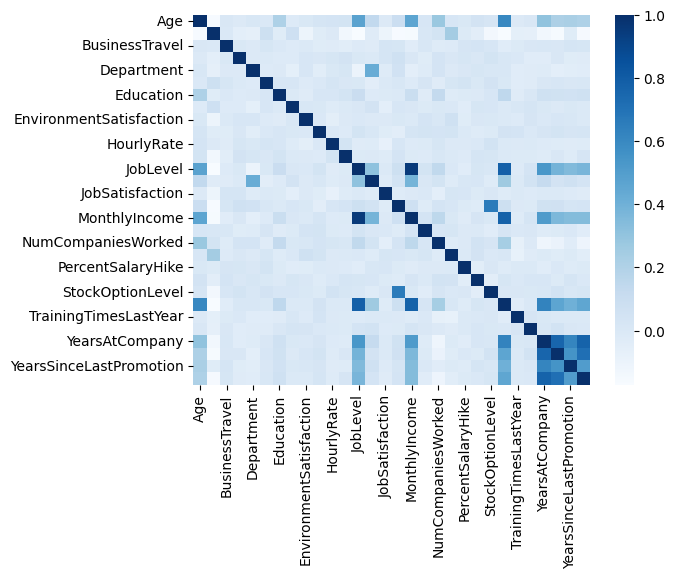

In [ ]:
sns.heatmap(df.corr(), cmap='Blues')

#df.corr().sort_values(by='Attrition', ascending=False)

#4.Modeling

##4-1.Prepocessing

In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = df.drop(['Attrition', 'DistanceFromHome_bi'], axis=1)
y = df['Attrition']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 29)
(441, 29)
(1029,)
(441,)


In [ ]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### 파이캐럿

In [ ]:
!pip install pycaret
!pip install --upgrade pycaret scipy
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.4 MB/s 

In [ ]:
feature_names = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

'''
['BusinessTravel', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion']
'''

data = pd.DataFrame(X_train, columns=feature_names)  # X_train.columns는 원래 데이터의 특성 이름들을 나타냅니다.
data['target'] = y_train

In [ ]:
from pycaret.classification import *

# PyCaret 설정
exp_clf101 = setup(data=data, target='target', session_id=123)

# 모델 비교 및 선택
best_model = compare_models()

# 모델 학습
tuned_best_model = tune_model(best_model)

# 모델 평가
evaluate_model(tuned_best_model)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(1029, 30)"
4,Transformed data shape,"(1029, 30)"
5,Transformed train set shape,"(720, 30)"
6,Transformed test set shape,"(309, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8639,0.7878,0.2833,0.6806,0.3907,0.3315,0.3753,0.1380
ada,Ada Boost Classifier,0.8569,0.7776,0.3273,0.6062,0.4190,0.3470,0.3711,0.2580
ridge,Ridge Classifier,0.8556,0.0000,0.1280,0.7083,0.2135,0.1818,0.2668,0.0950
lightgbm,Light Gradient Boosting Machine,0.8542,0.7544,0.2235,0.6305,0.3227,0.2645,0.3112,0.7370
et,Extra Trees Classifier,0.8528,0.7862,0.1038,0.8167,0.1804,0.1530,0.2566,0.6520
xgboost,Extreme Gradient Boosting,0.8528,0.7492,0.2235,0.6313,0.3103,0.2539,0.3014,0.1730
rf,Random Forest Classifier,0.8514,0.7693,0.0864,0.7667,0.1523,0.1304,0.2298,0.7310
gbc,Gradient Boosting Classifier,0.8514,0.7746,0.2152,0.6922,0.3076,0.2498,0.3093,0.4310
lr,Logistic Regression,0.8486,0.7652,0.1652,0.6350,0.2498,0.1993,0.2582,2.1130
svm,SVM - Linear Kernel,0.8389,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8472,0.6826,0.0909,0.5000,0.1538,0.1121,0.1631
1,0.8750,0.8927,0.1818,1.0000,0.3077,0.2735,0.3980
2,0.8889,0.7392,0.4545,0.7143,0.5556,0.4956,0.5122
3,0.8472,0.8346,0.2727,0.5000,0.3529,0.2747,0.2910
4,0.8611,0.7694,0.2500,0.7500,0.3750,0.3182,0.3796
5,0.8750,0.8847,0.2500,1.0000,0.4000,0.3571,0.4663
6,0.8194,0.6389,0.0833,0.3333,0.1333,0.0714,0.0933
7,0.8750,0.8542,0.3333,0.8000,0.4706,0.4130,0.4642
8,0.8750,0.8653,0.4167,0.7143,0.5263,0.4600,0.4822


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# 기존 파이캐럿

# from pycaret.classification import *

# split_index = 500

# X_train = X[:split_index]
# X_test = X[split_index:]

# y_train = y[:split_index]
# y_test = y[split_index:]

# clf = setup(X, target=y)
# comp = compare_models(sort='Accuracy')

##4-2.MinMaxScale

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 잘 됐는지 확인
print(X_train)

[[0.         0.         0.70373027 ... 0.33333333 0.06666667 0.41176471]
 [0.5        0.         0.81779053 ... 0.11111111 0.13333333 0.11764706]
 [1.         0.         0.15208034 ... 0.38888889 0.13333333 0.58823529]
 ...
 [0.         0.         0.82783357 ... 0.11111111 0.13333333 0.11764706]
 [1.         0.5        0.98063128 ... 0.05555556 0.         0.        ]
 [0.5        0.         0.92969871 ... 0.11111111 0.         0.11764706]]


### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Extra Trees Classifier 모델 생성
model = ExtraTreesClassifier(random_state=42) # n_estimators=100

# 모델 훈련
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import gmean
print("ExtraTreesClassifier\n")
cm = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, predictions)
print("ExtraTreesClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))

ExtraTreesClassifier

Confusion Matrix:
[[368   2]
 [ 52  19]]
G-Mean :  0.515906112450068 

ExtraTreesClassifier Accuracy :  0.8775510204081632
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.90      0.27      0.41        71

    accuracy                           0.88       441
   macro avg       0.89      0.63      0.67       441
weighted avg       0.88      0.88      0.85       441



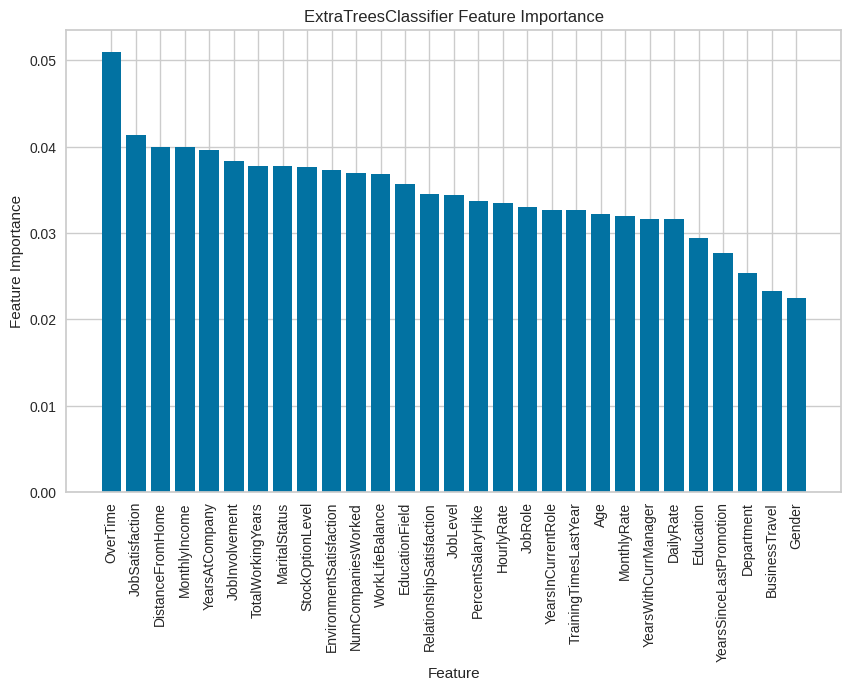

In [ ]:
feature_importances = model.feature_importances_

# 특성의 이름(열 이름)을 얻어옵니다.
feature_names = X.columns  # X는 특성을 담고 있는 데이터프레임입니다.

# 중요도가 높은 순으로 특성을 정렬합니다.
sorted_idx = feature_importances.argsort()[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("ExtraTreesClassifier Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm

rf_s = RandomForestClassifier(random_state=1)

rf_s.fit(X_train, y_train)

y_pred = rf_s.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import gmean
print("Random Forest Classifier\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier

Confusion Matrix:
[[365   5]
 [ 51  20]]
G-Mean :  0.5271465804879484 

RandomForestClassifier Accuracy :  0.873015873015873
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.80      0.28      0.42        71

    accuracy                           0.87       441
   macro avg       0.84      0.63      0.67       441
weighted avg       0.86      0.87      0.85       441



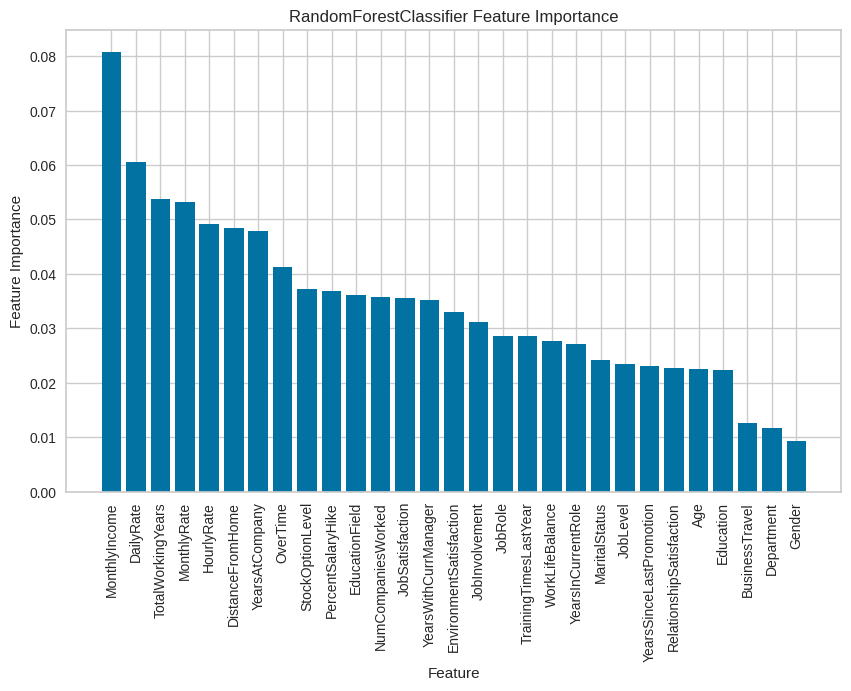

In [ ]:
feature_importances = rf_s.feature_importances_

# 특성의 이름(열 이름)을 얻어옵니다.
feature_names = X.columns  # X는 특성을 담고 있는 데이터프레임입니다.

# 중요도가 높은 순으로 특성을 정렬합니다.
sorted_idx = feature_importances.argsort()[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("RandomForestClassifier Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

##4-3.오버샘플링(SMOTE)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE(random_state=1)

# train데이터를 넣어 복제함
X_train_over,y_train_over = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_train_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over==0)))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e71bac5f5b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


After OverSampling, the shape of train_X: (1726, 29)
After OverSampling, the shape of train_y: (1726, 29) 

After OverSampling, counts of label '1': 863
After OverSampling, counts of label '0': 863


In [ ]:
X_train_over.shape, y_train_over.shape

((1726, 29), (1726,))

### 파이캐럿(샘플링 후)

In [ ]:
# !pip install pycaret
# !pip install --upgrade pycaret scipy
# !pip install --upgrade scipy

In [ ]:
# X_train_over와 y_train_over를 데이터프레임으로 변환
feature_names = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']


      #  ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
      #  'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
      #  'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
      #  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
      #  'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
      #  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
      #  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
      #  'YearsInCurrentRole', 'YearsSinceLastPromotion',
      #  'YearsWithCurrManager']


data = pd.DataFrame(X_train_over, columns=feature_names)  # X_train.columns는 원래 데이터의 특성 이름들을 나타냅니다.
data['target'] = y_train_over

In [ ]:
from pycaret.classification import *

# PyCaret 설정
exp_clf101 = setup(data=data, target='target', session_id=123)

# 모델 비교 및 선택
best_model = compare_models()

# 모델 학습
tuned_best_model = tune_model(best_model)

# 모델 평가
evaluate_model(tuned_best_model)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(1726, 30)"
4,Transformed data shape,"(1726, 30)"
5,Transformed train set shape,"(1208, 30)"
6,Transformed test set shape,"(518, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9594,0.9929,0.9571,0.9624,0.9593,0.9189,0.9197,0.7080
lightgbm,Light Gradient Boosting Machine,0.9371,0.9803,0.9090,0.9639,0.9351,0.8741,0.8763,3.3460
rf,Random Forest Classifier,0.9304,0.9813,0.9023,0.9563,0.9284,0.8609,0.8625,0.7380
xgboost,Extreme Gradient Boosting,0.9247,0.9756,0.9073,0.9408,0.9233,0.8493,0.8505,0.3350
gbc,Gradient Boosting Classifier,0.9222,0.9741,0.8956,0.9467,0.9199,0.8444,0.8464,0.8460
ada,Ada Boost Classifier,0.8990,0.9597,0.9007,0.8979,0.8991,0.7981,0.7984,0.4680
qda,Quadratic Discriminant Analysis,0.8353,0.9107,0.8410,0.8339,0.8363,0.6705,0.6725,0.1000
dt,Decision Tree Classifier,0.8311,0.8311,0.8428,0.8258,0.8324,0.6622,0.6653,0.0430
lr,Logistic Regression,0.8005,0.8644,0.8312,0.7846,0.8061,0.6010,0.6040,0.0460
ridge,Ridge Classifier,0.7947,0.0000,0.8411,0.7708,0.8036,0.5894,0.5934,0.0310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9710,0.9000,0.9153,0.9076,0.8181,0.8183
1,0.8678,0.9596,0.8500,0.8793,0.8644,0.7354,0.7358
2,0.8347,0.9153,0.8500,0.8226,0.8361,0.6695,0.6699
3,0.8512,0.9437,0.8667,0.8387,0.8525,0.7025,0.7029
4,0.8595,0.9443,0.8852,0.8438,0.8640,0.7189,0.7198
5,0.8678,0.9331,0.8689,0.8689,0.8689,0.7355,0.7355
6,0.8595,0.9604,0.8197,0.8929,0.8547,0.7192,0.7216
7,0.8678,0.9391,0.8033,0.9245,0.8596,0.7358,0.7423
8,0.8500,0.9536,0.9000,0.8182,0.8571,0.7000,0.7035


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# from pycaret.classification import *

# split_index = 500

# X_train = X_resampled[:split_index]
# X_test = X_resampled[split_index:]

# y_train = y[:split_index]
# y_test = y[split_index:]

# clf = setup(X, target=y)
# comp = compare_models(sort='Accuracy')

### Extra Trees Classifier(샘플링 후)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Extra Trees Classifier 모델 생성
model = ExtraTreesClassifier(random_state=42) # n_estimators=100

# 모델 훈련
model.fit(X_train_over, y_train_over)

# 예측
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import gmean
print("extra\n")
cm = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, predictions)
print("extraForestClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))

extra

Confusion Matrix:
[[359  11]
 [ 45  26]]
G-Mean :  0.5960790550063658 

extraForestClassifier Accuracy :  0.873015873015873
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.70      0.37      0.48        71

    accuracy                           0.87       441
   macro avg       0.80      0.67      0.70       441
weighted avg       0.86      0.87      0.86       441



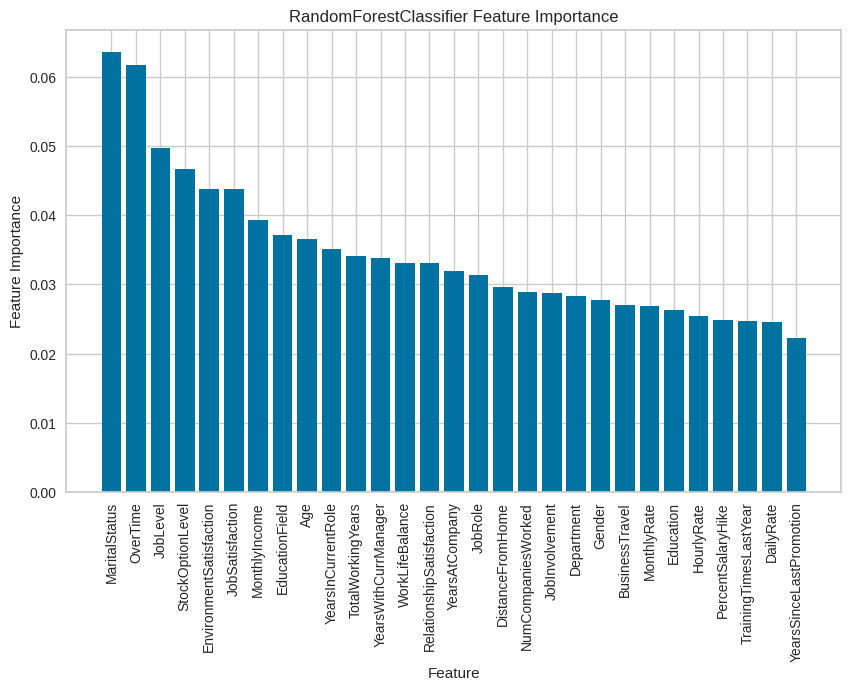

In [ ]:
feature_importances = model.feature_importances_

# 특성의 이름(열 이름)을 얻어옵니다.
feature_names = X.columns  # X는 특성을 담고 있는 데이터프레임입니다.

# 중요도가 높은 순으로 특성을 정렬합니다.
sorted_idx = feature_importances.argsort()[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("RandomForestClassifier Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

### lightgbm(샘플링 후)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 데이터를 불러오고 나누기

# LightGBM 데이터셋으로 변환
train_data = lgb.Dataset(X_train_over, label=y_train_over)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# LightGBM 모델 설정
params = {
    'objective': 'binary',  # 이진 분류인 경우
    'metric': 'binary_error',  # 이진 분류인 경우
    'boosting_type': 'gbdt',  # gbdt는 일반적인 그래디언트 부스팅
    'num_leaves': 31,  # 각 반복에서 학습할 리프 노드의 최대 개수
    'learning_rate': 0.05,  # 학습률
    'feature_fraction': 0.9,  # 각 트리마다 사용할 특성 비율
}

# LightGBM 모델 훈련
num_round = 100  # 반복 횟수
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# 테스트 데이터에 대한 예측
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# 예측을 0 또는 1로 변환
threshold = 0.5  # 예측값을 0 또는 1로 변환할 임계값
y_pred_binary = [1 if pred > threshold else 0 for pred in y_pred]

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# 기타 평가 메트릭스 출력
print(classification_report(y_test, y_pred_binary))

[LightGBM] [Info] Number of positive: 863, number of negative: 863
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6520
[LightGBM] [Info] Number of data points in the train set: 1726, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8662131519274376
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       370
           1       0.62      0.42      0.50        71

    accuracy                           0.87       441
   macro avg       0.76      0.69      0.71       441
weighted avg       0.85      0.87      0.86       441



### RandomForestClassifier(샘플링 후)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm

rf = RandomForestClassifier(random_state=1)

rf.fit(X_train_over, y_train_over)

y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import gmean
print("Random Forest Classifier\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier

Confusion Matrix:
[[353  17]
 [ 49  22]]
G-Mean :  0.5437116726228403 

RandomForestClassifier Accuracy :  0.8503401360544217
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.56      0.31      0.40        71

    accuracy                           0.85       441
   macro avg       0.72      0.63      0.66       441
weighted avg       0.83      0.85      0.83       441



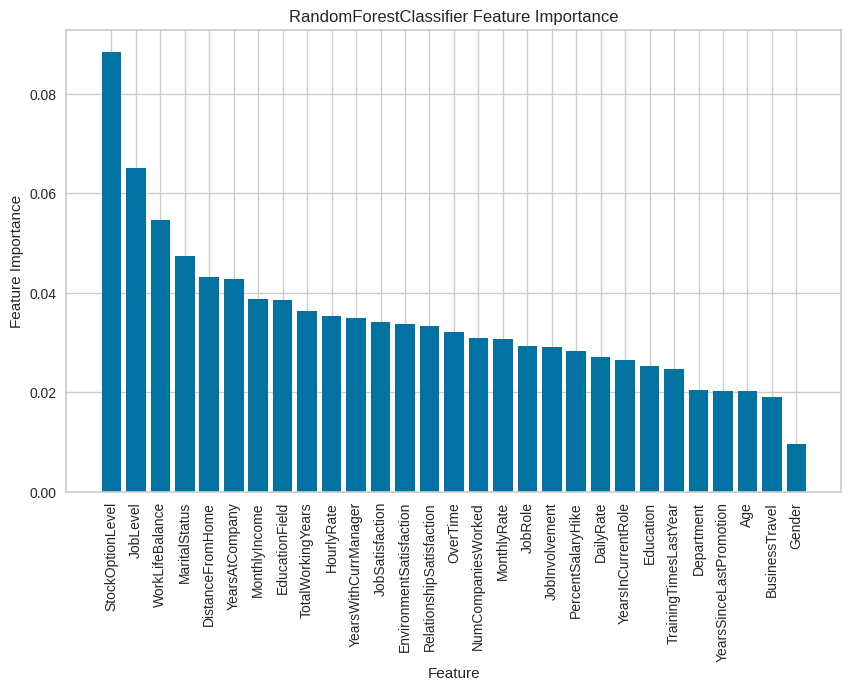

In [ ]:
feature_importances = rf.feature_importances_

# 특성의 이름(열 이름)을 얻어옵니다.
feature_names = X.columns  # X는 특성을 담고 있는 데이터프레임입니다.

# 중요도가 높은 순으로 특성을 정렬합니다.
sorted_idx = feature_importances.argsort()[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("RandomForestClassifier Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

# T-통계량 (T-statistic)
-  t-검정은 두 집단 간의 평균 차이가 통계적으로 유의미한지 검정하는 데 사용됩니다.
- T-통계량은 두 집단 간의 평균 차이를 나타내며, 이 차이가 얼마나 큰지와 표본 크기에 대한 정보를 고려합니다.
- T-통계량이 크면 평균 차이가 크다는 것을 나타내며, 작으면 평균 차이가 작다는 것을 의미합니다.

# P-값 (P-value)
- P-값은 0과 1 사이의 값을 가지며, 일반적으로 작을수록 결과가 특이하다는 것을 의미합니다. 보통 0.05(5%)를 기준으로 하여 P-값이 이 값보다 작을 경우, 해당 결과는 통계적으로 유의미하다고 판단됩니다.

# A / B Test

## a. 임금 인상 또는 자사주 지급(stock option)을 통한 금전적 보상 체계 개편 .

In [ ]:
stock_table = df[df['StockOptionLevel'] != 0]
non_stock_table = df[df['StockOptionLevel'] == 0]

print(len(non_stock_table))
print(len(stock_table))

631
839


In [ ]:
from scipy import stats
# 귀무가설(H0) : (StockOptionLevel = 0에서 Attrition의 평균) =< (StockOptionLevel = 1에서 Attrition의 평균)
# 대립가설(H1) : (StockOptionLevel = 0에서 Attrition의 평균) > (StockOptionLevel = 1 Attrition의 평균)

stock_table = df[df['StockOptionLevel'] != 0][:600]
non_stock_table = df[df['StockOptionLevel'] == 0][:600]


t_statistic, p_value = stats.ttest_rel(stock_table.Attrition, non_stock_table.Attrition, alternative='less')

print(f"T-statistic : {t_statistic:.4f}")
print(f"P-value : {p_value:.4f}")

# 유의수준 0.05하에 P_value가 0.0000이므로 귀무가설을 기각한다.
# stock_table의 Attrition의 평균이 non_stock_table의 Attrition의 평균보다 작다고 할 수 있다.

T-statistic : -7.1766
P-value : 0.0000


## c. 사내 커플 및 결혼 장려 문화 정착.

In [ ]:
non_single_table = df[df['MaritalStatus'] != 'Single']
single_table = df[df['MaritalStatus'] == 'Single']

print(len(non_single_table))
print(len(single_table))

1000
470


In [ ]:
from scipy import stats
# 귀무가설(H0) : (MaritalStatus == Single에서 Attrition의 평균) <= (MaritalStatus != Single에서 Attrition의 평균)
# 대립가설(H1) : (MaritalStatus == Single에서 Attrition의 평균) > (MaritalStatus != Single에서 Attrition의 평균)

non_single_table = df[df['MaritalStatus'] != 'Single'][:470]
single_table = df[df['MaritalStatus'] == 'Single'][:470]

t_statistic, p_value = stats.ttest_rel(non_single_table.Attrition, single_table.Attrition, alternative='less')
print(f"T-statistic : {t_statistic:.4f}")
print(f"P-value : {p_value:.4f}")

# 유의수준 0.05하에 P_value가 0.0000이므로 귀무가설을 기각한다.
# non_single_table의 Attrition의 평균이 single_table의 Attrition의 평균보다 작다고 할 수 있다.

T-statistic : -5.6513
P-value : 0.0000


## d. 야근 없는 회사 문화 정착및 업무 효율화 진행.

In [ ]:
over_time_no = df[df['OverTime'] != 'Yes']
over_time_yes = df[df['OverTime'] == 'Yes']

print(len(over_time_yes))
print(len(over_time_no))

416
1054


In [ ]:
from scipy import stats
# 귀무가설(H0) : (OverTime = Yes에서 Attrition의 평균) >= (OverTime != Yes에서 Attrition의 평균)
# 대립가설(H1) : (OverTime = Yes에서 Attrition의 평균) < (OverTime != Yes에서 Attrition의 평균)

over_time_no = df[df['OverTime'] != 'Yes'][:416]
over_time_yes = df[df['OverTime'] == 'Yes'][:416]


t_statistic, p_value = stats.ttest_rel(over_time_no.Attrition, over_time_yes.Attrition, alternative='less')
print(f"T-statistic : {t_statistic:.4f}")
print(f"P-value : {p_value:.4f}")

# 유의수준 0.05하에 P_value가 0.0000이므로 귀무가설을 기각한다.
# over_time_no의 Attrition의 평균이 over_time_yes의 Attrition의 평균보다 작다고 할 수 있다.

T-statistic : -7.8584
P-value : 0.0000


## e. 통근 거리에 따른 당사 기숙사 및 정착 지원금 지원 제도 신설.

In [ ]:
near_table = df[df['DistanceFromHome'] == 'near']
far_table = df[df['DistanceFromHome'] == 'far']

print(len(near_table))
print(len(far_table))

1055
415


In [ ]:
from scipy import stats

# 귀무가설(H0) : (near에서 Attrition의 평균) => (far에서 Attrition의 평균)
# 대립가설(H1) : (near에서 Attrition의 평균) < (far에서 Attrition의 평균)

near_table = df[df['DistanceFromHome'] == 'near'][:400]
far_table = df[df['DistanceFromHome'] == 'far'][:400]


t_statistic, p_value = stats.ttest_rel(near_table.Attrition, far_table.Attrition, alternative='less')
print(f"T-statistic : {t_statistic:.4f}")
print(f"P-value : {p_value:.4f}")

# 유의수준 0.05하에 P_value가 0.0006이므로 귀무가설을 기각한다.
# near_table 의 Attrition의 평균이 far_table의 Attrition의 평균보다 작다고 할 수 있다.

T-statistic : -3.2465
P-value : 0.0006
